In [1]:
!pip install factor_analyzer 

import pandas as pd 

from sklearn.preprocessing import StandardScaler 

from sklearn.decomposition import PCA 

from factor_analyzer import FactorAnalyzer 

import matplotlib.pyplot as plt 

import seaborn as sns 


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42715 sha256=d3b0e824d74128be92aa6fbfd7666384b7f0c25a15148b593ffec3b5e0cff64e
  Stored in directory: c:\users\sharo\appdata\local\pip\cache\wheels\a2\af\06\f4d4ed4d9d714fda437fb1583629417319603c2266e7b233cc
Successfully built factor_analyzer


In [3]:
df = pd.read_csv("C:\\vcu extra\\assignment\\data\\Survey.csv")    

In [4]:
# Step 1: Select only numerical columns relevant for PCA/FA
numeric_cols = [
    'Age', 'Monthly Household Income', 'Income', 'Number of rooms', 'Size of House', 'Budget',
    'Maintainance', 'EMI', '1.Proximity to city', '2.Proximity to schools', '3. Proximity to transport',
    '4. Proximity to work place', '5. Proximity to shopping', '1. Gym/Pool/Sports facility',
    '2. Parking space', '3.Power back-up', '4.Water supply', '5.Security',
    '1. Exterior look ', '2. Unit size', '3. Interior design and branded components',
    '4. Layout plan (Integrated etc.)', '5. View from apartment',
    '1. Price', '2. Booking amount', '3. Equated Monthly Instalment (EMI)',
    '4. Maintenance charges', '5. Availability of loan',
    '1. Builder reputation', '2. Appreciation potential',
    '3. Profile of neighbourhood', '4. Availability of domestic help'
]


In [5]:
print(df.columns)

Index(['City', 'Sex', 'Age', 'Occupation', 'Monthly Household Income',
       'Income', 'Planning to Buy a new house', 'Time Frame',
       'Reasons for buying a house', 'what type of House', 'Number of rooms',
       'Size of House', 'Budget', 'Finished/Semi Finished',
       'Influence Decision', 'Maintainance', 'EMI', '1.Proximity to city',
       '2.Proximity to schools', '3. Proximity to transport',
       '4. Proximity to work place', '5. Proximity to shopping',
       '1. Gym/Pool/Sports facility', '2. Parking space', '3.Power back-up',
       '4.Water supply', '5.Security', '1. Exterior look ', '2. Unit size',
       '3. Interior design and branded components',
       '4. Layout plan (Integrated etc.)', '5. View from apartment',
       '1. Price', '2. Booking amount', '3. Equated Monthly Instalment (EMI)',
       '4. Maintenance charges', '5. Availability of loan',
       '1. Builder reputation', '2. Appreciation potential',
       '3. Profile of neighbourhood', '4. Availabilit

In [6]:
# Investigate non-numeric columns
for col in numeric_cols:
  if df[col].dtype == 'object':
    print(f"Column '{col}' has object dtype and contains unique values:\n{df[col].unique()}\n")


Column 'Age' has object dtype and contains unique values:
['26-35' '46-60' '36-45' '18-25' '>60']

Column 'Monthly Household Income' has object dtype and contains unique values:
['85,001 to105,000' '45,001 to 65,000' '25,001 to 45,000' '>125000'
 '65,0001 to 85,000' '105,000 to 125000']

Column 'Number of rooms' has object dtype and contains unique values:
['2BHK' '1BHK' '3BHK' '4BHK']

Column 'Size of House' has object dtype and contains unique values:
['1001-1400' '601-1000' '<600' '1401-1800' '2200-2600' '1801-2200' '>2600']

Column 'Budget' has object dtype and contains unique values:
['65.1 to 80L' '25.1 to 40L' '<25L' '95.1 to110L' '40.1 to 65L'
 '80.1 to 95L' '>110']

Column 'Maintainance' has object dtype and contains unique values:
['2001to 4000' '<2000' '6001 to 8000' '4001 to 6000' '8001 to 10000'
 '>10000']

Column 'EMI' has object dtype and contains unique values:
['35.1K to 50K' '20.1K to 35K' '<20K' '>65K' '50.1K to 65K']



In [7]:
# Convert categorical columns to numerical
def map_age(age_range):
    if age_range == '18-25': return 21.5
    elif age_range == '26-35': return 30.5
    elif age_range == '36-45': return 40.5
    elif age_range == '46-60': return 53
    elif age_range == '>60': return 70
    return None

def map_income(income_range):
    if income_range == '<25000': return 12500 # Assuming <25000
    elif income_range == '25,001 to 45,000': return 35000
    elif income_range == '45,001 to 65,000': return 55000
    elif income_range == '65,0001 to 85,000': return 75000.5 # Corrected typo in range
    elif income_range == '85,001 to105,000': return 95000.5 # Corrected typo in range
    elif income_range == '105,000 to 125000': return 115000
    elif income_range == '>125000': return 150000 # Assuming >125000
    return None

def map_rooms(rooms):
    if rooms == '1BHK': return 1
    elif rooms == '2BHK': return 2
    elif rooms == '3BHK': return 3
    elif rooms == '4BHK': return 4
    return None

def map_size(size_range):
    if size_range == '<600': return 300
    elif size_range == '601-1000': return 800.5
    elif size_range == '1001-1400': return 1200.5
    elif size_range == '1401-1800': return 1600.5
    elif size_range == '1801-2200': return 2000.5
    elif size_range == '2200-2600': return 2400.5
    elif size_range == '>2600': return 3000 # Assuming >2600
    return None

def map_budget(budget_range):
    if budget_range == '<25L': return 12.5
    elif budget_range == '25.1 to 40L': return 32.55
    elif budget_range == '40.1 to 65L': return 52.55
    elif budget_range == '65.1 to 80L': return 72.55
    elif budget_range == '80.1 to 95L': return 87.55
    elif budget_range == '95.1 to110L': return 102.55 # Corrected typo
    elif budget_range == '>110': return 120 # Assuming >110L
    return None

def map_maintainance(maintainance_range):
    if maintainance_range == '<2000': return 1000
    elif maintainance_range == '2001to 4000': return 3000.5 # Corrected typo
    elif maintainance_range == '4001 to 6000': return 5000.5
    elif maintainance_range == '6001 to 8000': return 7000.5
    elif maintainance_range == '8001 to 10000': return 9000.5
    elif maintainance_range == '>10000': return 11000 # Assuming >10000
    return None

def map_emi(emi_range):
    if emi_range == '<20K': return 10000
    elif emi_range == '20.1K to 35K': return 27500.5
    elif emi_range == '35.1K to 50K': return 42500.5
    elif emi_range == '50.1K to 65K': return 57500.5
    elif emi_range == '>65K': return 70000 # Assuming >65K
    return None

df['Age_numeric'] = df['Age'].apply(map_age)
df['Monthly Household Income_numeric'] = df['Monthly Household Income'].apply(map_income)
df['Number of rooms_numeric'] = df['Number of rooms'].apply(map_rooms)
df['Size of House_numeric'] = df['Size of House'].apply(map_size)
df['Budget_numeric'] = df['Budget'].apply(map_budget)
df['Maintainance_numeric'] = df['Maintainance'].apply(map_maintainance)
df['EMI_numeric'] = df['EMI'].apply(map_emi)



In [8]:
numeric_cols_processed = [col for col in numeric_cols if df[col].dtype != 'object']




numeric_cols_processed.extend(['Age_numeric', 'Monthly Household Income_numeric', 'Number of rooms_numeric', 'Size of House_numeric', 'Budget_numeric', 'Maintainance_numeric', 'EMI_numeric'])


In [10]:
# Drop missing values
df_numeric = df[numeric_cols_processed].dropna()

# Standardize
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)



In [11]:
pca = PCA()
pca_result = pca.fit_transform(scaled_data)


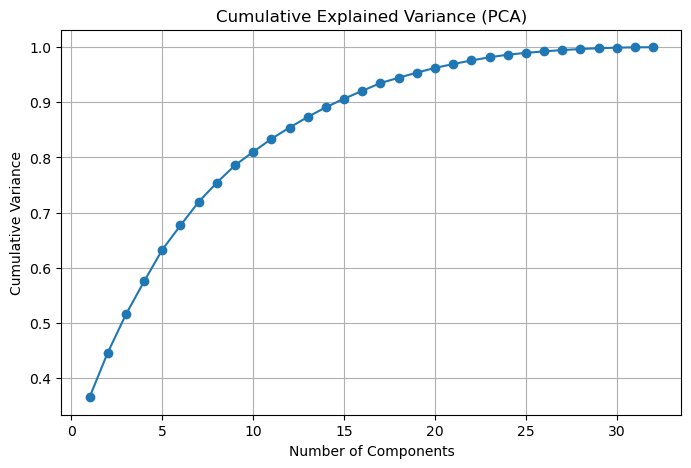

Factor Loadings:
                                               0     1     2     3     4
Income                                     0.84  0.38  0.03 -0.07  0.13
1.Proximity to city                        0.50  0.05  0.53  0.13 -0.32
2.Proximity to schools                     0.21  0.19  0.45 -0.17  0.19
3. Proximity to transport                 -0.06 -0.04 -0.13  0.01  0.51
4. Proximity to work place                 0.00 -0.06  0.76 -0.03  0.01
5. Proximity to shopping                   0.22  0.69  0.21  0.33 -0.07
1. Gym/Pool/Sports facility                0.23  0.45  0.21 -0.11  0.19
2. Parking space                           0.27  0.48  0.28 -0.17 -0.01
3.Power back-up                            0.06  0.41  0.48  0.06 -0.01
4.Water supply                             0.35  0.34  0.18 -0.08  0.69
5.Security                                 0.13  0.72 -0.04 -0.08  0.28
1. Exterior look                           0.50  0.53 -0.03  0.31 -0.38
2. Unit size                               0.2

In [12]:
# Plot Scree Plot
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Cumulative Explained Variance (PCA)')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.grid(True)
plt.show()

# Step 3: Factor Analysis (number of factors based on Eigenvalues > 1)
fa = FactorAnalyzer(n_factors=5, rotation='varimax')  # Adjust factor count based on scree plot or eigenvalues
fa.fit(scaled_data)

# Show Loadings
loadings = pd.DataFrame(fa.loadings_, index=numeric_cols_processed)
print("Factor Loadings:\n", loadings.round(2))


In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
df = pd.read_csv("C:\\vcu extra\\assignment\\data\\Survey.csv")  

In [17]:
vars_to_use = ['Age', 'Sex', 'Occupation', 'Monthly Household Income', 'Income', 'Number of rooms', 'Size of House', 'Budget']
data = df[vars_to_use].dropna().copy() 


In [18]:
# Convert categorical columns to numerical using mapping functions from the previous cell
def map_age(age_range):
    if age_range == '18-25': return 21.5
    elif age_range == '26-35': return 30.5
    elif age_range == '36-45': return 40.5
    elif age_range == '46-60': return 53
    elif age_range == '>60': return 70
    return None

def map_income(income_range):
    if income_range == '<25000': return 12500 # Assuming <25000
    elif income_range == '25,001 to 45,000': return 35000
    elif income_range == '45,001 to 65,000': return 55000
    elif income_range == '65,0001 to 85,000': return 75000.5 # Corrected typo in range
    elif income_range == '85,001 to105,000': return 95000.5 # Corrected typo in range
    elif income_range == '105,000 to 125000': return 115000
    elif income_range == '>125000': return 150000 # Assuming >125000
    return None

def map_rooms(rooms):
    if rooms == '1BHK': return 1
    elif rooms == '2BHK': return 2
    elif rooms == '3BHK': return 3
    elif rooms == '4BHK': return 4
    return None

def map_size(size_range):
    if size_range == '<600': return 300
    elif size_range == '601-1000': return 800.5
    elif size_range == '1001-1400': return 1200.5
    elif size_range == '1401-1800': return 1600.5
    elif size_range == '1801-2200': return 2000.5
    elif size_range == '2200-2600': return 2400.5
    elif size_range == '>2600': return 3000 # Assuming >2600
    return None

def map_budget(budget_range):
    if budget_range == '<25L': return 12.5
    elif budget_range == '25.1 to 40L': return 32.55
    elif budget_range == '40.1 to 65L': return 52.55
    elif budget_range == '65.1 to 80L': return 72.55
    elif budget_range == '80.1 to 95L': return 87.55
    elif budget_range == '95.1 to110L': return 102.55 # Corrected typo
    elif budget_range == '>110': return 120 # Assuming >110L
    return None

def map_maintainance(maintainance_range):
    if maintainance_range == '<2000': return 1000
    elif maintainance_range == '2001to 4000': return 3000.5 # Corrected typo
    elif maintainance_range == '4001 to 6000': return 5000.5
    elif maintainance_range == '6001 to 8000': return 7000.5
    elif maintainance_range == '8001 to 10000': return 9000.5
    elif maintainance_range == '>10000': return 11000 # Assuming >10000
    return None

def map_emi(emi_range):
    if emi_range == '<20K': return 10000
    elif emi_range == '20.1K to 35K': return 27500.5
    elif emi_range == '35.1K to 50K': return 42500.5
    elif emi_range == '50.1K to 65K': return 57500.5
    elif emi_range == '>65K': return 70000 # Assuming >65K
    return None

data['Age'] = data['Age'].apply(map_age)
data['Monthly Household Income'] = data['Monthly Household Income'].apply(map_income)
data['Number of rooms'] = data['Number of rooms'].apply(map_rooms)
data['Size of House'] = data['Size of House'].apply(map_size)
data['Budget'] = data['Budget'].apply(map_budget)


In [19]:
# Step 2: Encode categorical columns
label_encoders = {}
for col in ['Sex', 'Occupation']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


In [20]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


C:\Users\sharo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sharo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sharo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sharo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

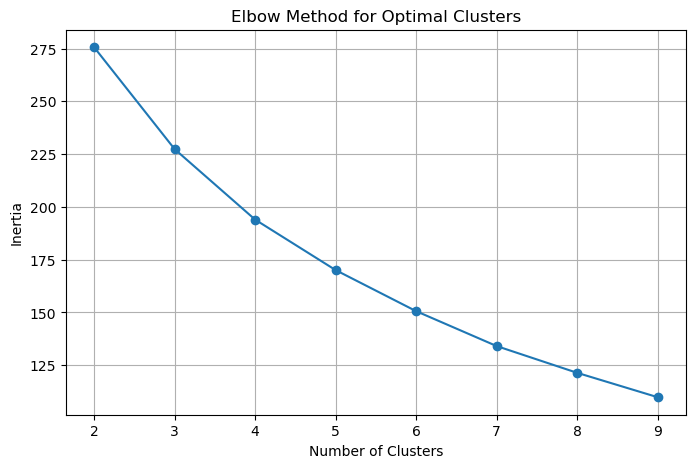

In [21]:
inertias = []
K_range = range(2, 10)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10) # Added n_init for KMeans
    km.fit(data_scaled)
    inertias.append(km.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [22]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS
import matplotlib.pyplot as plt


In [23]:
df = pd.read_csv("C:\\vcu extra\\assignment\\data\\icecream.csv") 

In [24]:
df.set_index("Brand", inplace=True)

In [25]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


In [26]:
mds = MDS(n_components=2, dissimilarity='euclidean', random_state=42)
mds_coords = mds.fit_transform(scaled_data)


In [27]:
mds_df = pd.DataFrame(mds_coords, columns=['Dim1', 'Dim2'], index=df.index)

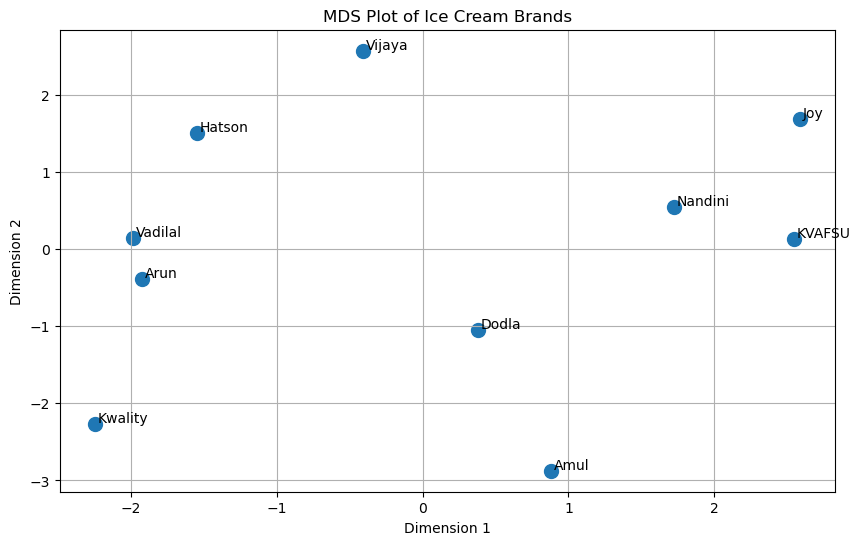

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(mds_df['Dim1'], mds_df['Dim2'], s=100)

for brand, (x, y) in mds_df.iterrows():
    plt.text(x + 0.02, y + 0.02, brand, fontsize=10)

plt.title('MDS Plot of Ice Cream Brands')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()


In [29]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder


In [30]:
df = pd.read_csv("C:\\vcu extra\\assignment\\data\\pizza_data.csv") 

In [31]:
X = df.drop(columns=['ranking'])
y = df['ranking']


In [32]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [33]:
for col in X_encoded.columns:
    if X_encoded[col].dtype == 'bool':
        X_encoded[col] = X_encoded[col].astype(int)


In [34]:
print(X_encoded.dtypes)

brand_Onesta         int32
brand_Oven Story     int32
brand_Pizza hut      int32
price_$2.00          int32
price_$3.00          int32
price_$4.00          int32
weight_200g          int32
weight_300g          int32
weight_400g          int32
crust_thin           int32
cheese_Mozzarella    int32
size_regular         int32
toppings_paneer      int32
spicy_normal         int32
dtype: object


In [35]:
X_encoded = sm.add_constant(X_encoded)

# Fit the model
model = sm.OLS(y, X_encoded).fit()

# View summary
print(model.summary())

import numpy as np

importance = {}


                            OLS Regression Results                            
Dep. Variable:                ranking   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     97.07
Date:                Sat, 12 Jul 2025   Prob (F-statistic):             0.0794
Time:                        12:13:48   Log-Likelihood:                 10.568
No. Observations:                  16   AIC:                             8.864
Df Residuals:                       1   BIC:                             20.45
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                17.3750      0.48

C:\Users\sharo\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  res = hypotest_fun_out(*samples, **kwds)


In [36]:
encoded_cols_map = {}
for attribute in X.columns:
    # Get the columns in X_encoded that originated from this attribute
    encoded_cols = [col for col in X_encoded.columns if col.startswith(attribute + '_')]
    if encoded_cols:
        encoded_cols_map[attribute] = encoded_cols
    # Handle the case where an attribute might have only one level after drop_first=True
    elif attribute in X_encoded.columns:
         encoded_cols_map[attribute] = [attribute]

for attribute, cols in encoded_cols_map.items():
    # Get the coefficients for the encoded columns corresponding to the attribute
    coefs = model.params[cols]
    rng = max(coefs) - min(coefs)
    importance[attribute] = rng


In [37]:
total = sum(importance.values())
importance_percent = {k: round((v / total) * 100, 2) for k, v in importance.items()}
importance_df = pd.DataFrame.from_dict(importance_percent, orient='index', columns=['Importance (%)'])
print(importance_df.sort_values(by='Importance (%)', ascending=False))


          Importance (%)
weight             86.11
price               8.33
brand               5.56
crust               0.00
cheese              0.00
size                0.00
toppings            0.00
spicy               0.00
